# SQL 📚

## Tasks

**Please deliver the following:** 

1. A function named `stocks` that returns a dataframe of all stock prices for a given year. This function should have one argument: `year`.
    - Drop all null values from this dataframe. 
    - Use this function to create a dataframe of 2017 stock prices.
    
2. Please create a file named `data_collection.py` within the `src` folder containing this function. 
3. Create a function called `begins_with_count`
    - This function should receive a letter and return the number of companies that begin with the given letter.
4. Create a histogram visualizing the distribution of these counts for every letter in the alphabet.
5. Interpret the histogram.

### How do I do this?

You have been given a database called `stocks.db` within the [data/](data/) folder of this repo. 
- This database contains the opening and closing prices for the S&P 500 from 2013-2018.

You will need to open up a connection to this database, construct an approproate SQL query, and move this code into a `stocks` function.

<center><h3>DATABASE SCHEMA</h3></center>

<img src="../static/db_schema.png" width=500 height=500>

Please complete the assigned task below:

In [57]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

def stocks(year):
    conn = sqlite3.connect('../data/stocks.db')
    df = pd.read_sql(f'''
                  SELECT open,
                         close,
                         date,
                         name
                  FROM price
                  JOIN date
                  ON price.date_id = date.id
                  JOIN company
                  ON price.company_id = company.id
                  WHERE date BETWEEN date('{year}-01-01') and date('{year+1}-01-01')''', conn)
    
    df.date = pd.to_datetime(df.date)
    return df

def stocks_more_pandas(year):
    conn = sqlite3.connect('../data/stocks.db')
    stocks = pd.read_sql('''
                            SELECT * from price
                            JOIN date
                            ON price.date_id = date.id
                            JOIN company
                            ON price.company_id = company.id''', conn)
    
    stocks.date = pd.to_datetime(stocks.date)
    return stocks[(stocks.date >= f'{year}-01-01') & (stocks.date < f'{year+1}-01-01')]




def stocks_with_even_more_pandas(year):
    conn = sqlite3.connect('../data/stocks.db')
    stocks = pd.read_sql('''
                            SELECT * from price
                            JOIN date
                            ON price.date_id = date.id
                            JOIN company
                            ON price.company_id = company.id LIMIT 6000''', conn)
    
    return stocks[(stocks.date >= f'{year}-01-01') & (stocks.date < f'{year+1}-01-01')]


def too_much_pandas(year):
    conn = sqlite3.connect('../data/stocks.db')
    def to_string(dataframe):
        for column in dataframe.columns:
            dataframe[column] = dataframe[column].astype(str)
            
        return dataframe
    
    price = pd.read_sql('''SELECT * from price''', conn)
    price = to_string(price)
    date = pd.read_sql('''SELECT * from date''', conn)
    date = to_string(date)
    company = pd.read_sql('''SELECT * from company''', conn)
    company = to_string(company)
    
    stocks = price\
    .merge(date.rename({'id': 'date_id'}, axis=1), on='date_id')\
    .merge(company.rename({'id':'company_id'}, axis=1), on='company_id')
    
    
    return stocks[(stocks.date >= f'{year}-01-01') & (stocks.date < f'{year+1}-01-01')]
    
    

In [33]:
df = stocks_with_even_more_pandas(2017)

In [58]:
df = too_much_pandas(2017)

In [59]:
df.shape

(126032, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1259 non-null   int64 
 1   date    1259 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.8+ KB


In [47]:
date.rename({'id': 'date_id'}, axis=1)

,date_id,date
0,1,2013-02-08 00:00:00
1,2,2013-02-11 00:00:00
2,3,2013-02-12 00:00:00
3,4,2013-02-13 00:00:00
4,5,2013-02-14 00:00:00
...,...,...
1254,1255,2018-02-01 00:00:00
1255,1256,2018-02-02 00:00:00
1256,1257,2018-02-05 00:00:00
1257,1258,2018-02-06 00:00:00


In [13]:
import string

def begins_with_count(letter):
    return len(df[df.name.str.startswith(letter)].name.unique())

begins_with = {}
for letter in string.ascii_uppercase:
    begins_with[letter] = begins_with_count(letter)

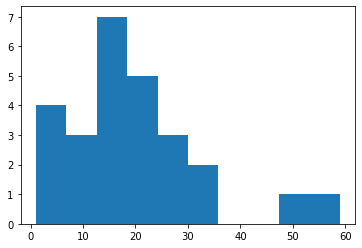

In [18]:
plt.hist(begins_with.values());